##FOLLOW THESE STEPS TO RUN THIS WORKBOOK
Run all cells by choosing the commands in this workbook as illustrated
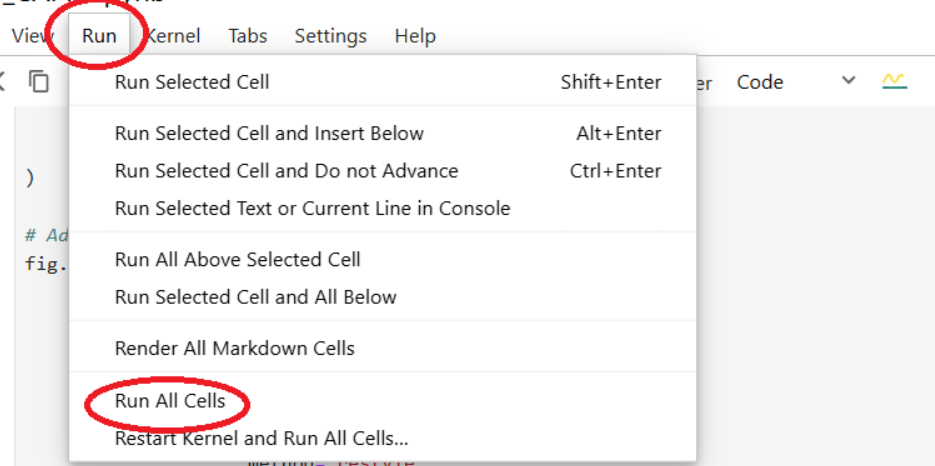




##The following model called Prophet was developed by Meta.
##Prophet is an excellent model for business forecasts.  It is a machine learning additive regression model. Prophet has backtesting already built into the model; whereby, the model will take part of the historical data to and determine how well it predicted the next period in order to train the model.  Backtesting as well as training a model is normally a cumbersome process without using this built in feature that Meta has created.
##The code for Prophet can be found by a general search on Github.com.
##The data is Johnson & Johnson company sales revenue in millions generated from Google Gemini on 9/24/2025.
##The graphs that follow are the sales figures that are partially historical and partially forecast through 2026.

Mounted at /content/drive


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdhxmkrc4/qo78jlwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdhxmkrc4/seg5if78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16879', 'data', 'file=/tmp/tmpdhxmkrc4/qo78jlwc.json', 'init=/tmp/tmpdhxmkrc4/seg5if78.json', 'output', 'file=/tmp/tmpdhxmkrc4/prophet_modelcz_l73by/prophet_model-20250924144458.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:58 - cmdstanpy - INFO - Chain [1] start processing
IN

            ds          yhat    yhat_lower    yhat_upper
368 2026-06-26  24148.681713  23612.857572  24715.370865
369 2026-06-27  24151.621553  23573.103218  24763.314649
370 2026-06-28  24154.561394  23543.689853  24773.061513
371 2026-06-29  24157.501234  23535.145201  24719.161969
372 2026-06-30  24160.441075  23549.189092  24763.101507


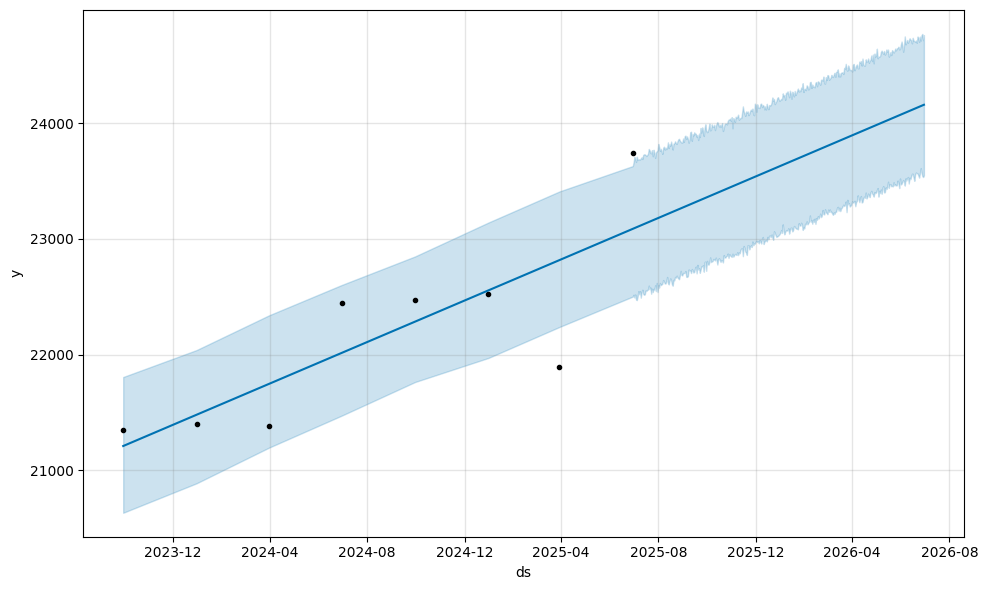

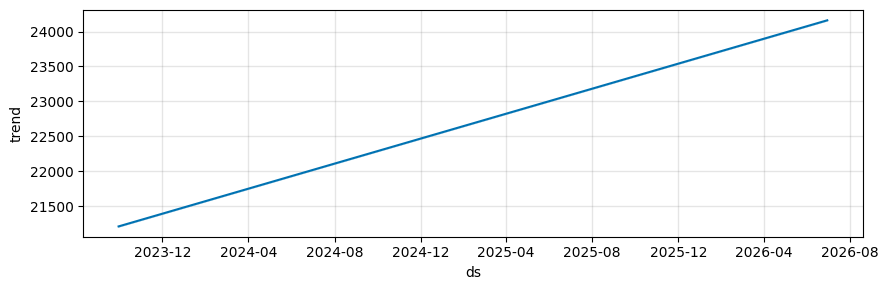

In [1]:
import pandas as pd
from prophet import Prophet

#Import data for Johnson & Johnson sales

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Johnson&Johnson.xlsx')

# Assuming your date column is named 'YourDateColumn' and your sales column is 'YourSalesColumn'
# Rename the columns to 'ds' and 'y'
df = data.rename(columns={'YourDateColumn': 'ds', 'YourSalesColumn': 'y'})

# Convert the 'ds' column to datetime objects
df['ds'] = pd.to_datetime(df['ds'])

# Ensure 'y' is numeric
df['y'] = pd.to_numeric(df['y'])

# 1. Instantiate the model
m = Prophet()

# 2. Fit the model to your data
m.fit(df)

# 3. Create a future DataFrame to make predictions
future = m.make_future_dataframe(periods=365)


# 4. Make the forecast
forecast = m.predict(future)

# You can now view the forecasted values, which include yhat (the prediction),
# and confidence intervals (yhat_lower, yhat_upper)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig1 = m.plot(forecast)

# Plot the forecast components (trend, weekly, yearly)
fig2 = m.plot_components(forecast)